# Python

[Centrale Lille, G3 SDIA | M1 DS, University of Lille]

---

## Lab 5 - data visualization with seaborn, parallel Markov chains with multiprocessing and dask

---


## Guidelines (read carefully before starting)


**Objectives**: acquire further practice with a few parallelisation techniques in Python (`multiprocessing`, `dask`).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the `.zip` archive in a local folder (Computer -> Documents/Python/);
- unzip the archive `.zip`;
- rename the folder with the convention `lab5_Name1_Name2`;
- duplicate the notebook file and rename it `lab5_Name1_Name2.ipynb`;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab5` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab5 --file=requirement.txt --channel conda-forge
    conda activate lab5
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab5
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab5`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented and unit-tested (see session 1). Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Unit-tests developed whenever appropriate (correctness, relevance)
4. Answers to the questions and overall presentation of the Jupyter notebook.

**Useful references for this lab**:

[1] `seaborn`: [official tutorial](https://seaborn.pydata.org/tutorial.html)

[2] `multiprocessing`: [documentation](https://docs.python.org/3/library/multiprocessing.html), [doc2](https://he-arc.github.io/livre-python/multiprocessing/index.html)

[3] `dask`: [documentation](http://numba.pydata.org/) 

## <a name="content">Contents</a>
- [Exercise 1: seaborn, a useful tool for data visualisation](#ex1)
- [Exercise 2: Simulating a discrete-time homogeneous Markov chain](#ex2)
- [Bonus: Parallel computing with Dask](#bonus)
---

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: seaborn, a useful tool for data visualisation</a> [(&#8593;)](#content)
 
The `seaborn` package can significantly enhance data and data analysis visualization. See the [tutorial page](https://seaborn.pydata.org/tutorial.html) for examples of effective predefined graphics. An example aimed at visualizing the empirical distributions of 9 realizations of a bivariate Gaussian random vector is reported below.

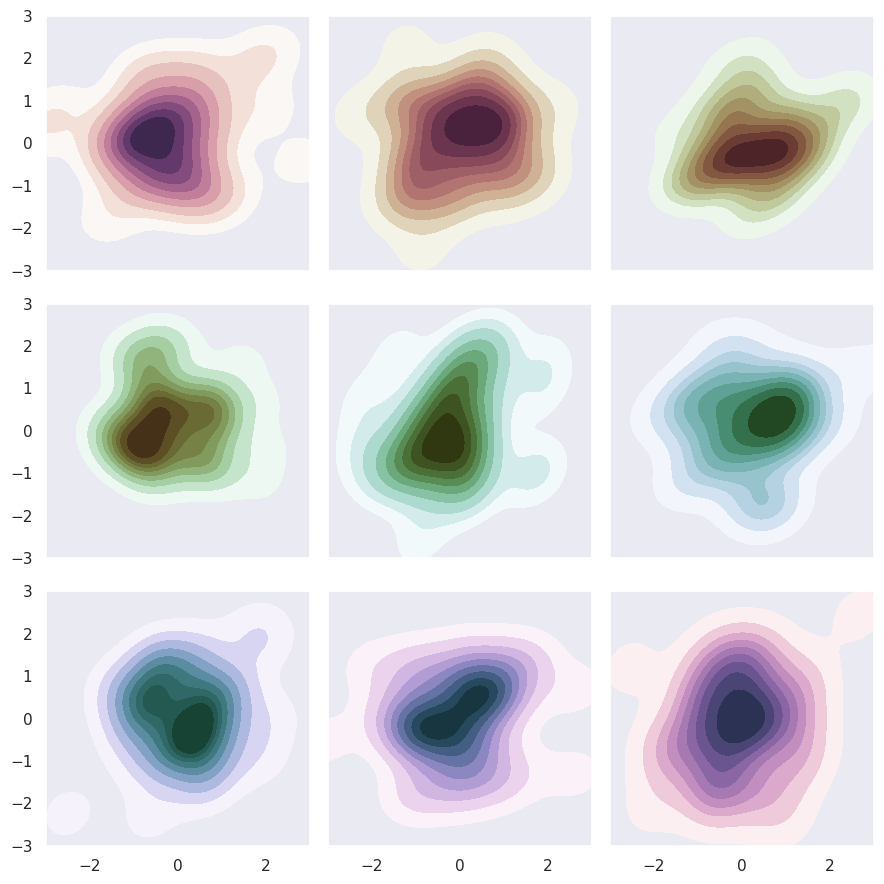

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- seaborn.set ---
# Set the overall visual style for seaborn plots.
# Parameters:
#   style="dark" - applies a dark background with lighter grid lines and elements.
sns.set(style="dark")

rng = np.random.default_rng(50)

# Set up the matplotlib figure with a 3x3 grid of subplots that share x and y axes.
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # --- seaborn.cubehelix_palette ---
    # Create a cubehelix color palette and convert it into a continuous colormap.
    # Parameters:
    #   start=s      - defines the hue value at the start of the helix.
    #   light=1      - sets maximum lightness for the palette.
    #   as_cmap=True - returns a matplotlib colormap object (continuous),
    #                  instead of a discrete list of colors.
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate two arrays (x, y) of 50 random samples each from a standard normal distribution.
    x, y = rng.normal(size=(2, 50))

    # --- seaborn.kdeplot ---
    # Plot a Kernel Density Estimate (KDE) of the bivariate data (x, y).
    # The KDE method estimates the underlying probability density function (PDF)
    # of the data by placing a smooth kernel (often Gaussian) at each data point,
    # and then summing these kernels to get a smooth continuous surface.
    # Parameters:
    #   x, y      - input data arrays.
    #   cmap      - colormap controlling the colors used to represent density levels.
    #   fill=True - fill the contour area under the KDE surface with color instead of just lines.
    #   cut=5     - extend the KDE beyond the extreme data points by 5 bandwidths, 
    #               giving a smoother look at the edges.
    #   ax=ax     - specify the subplot (axis) where this KDE plot should be drawn.
    sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, cut=5, ax=ax)

    ax.set(xlim=(-3, 3), ylim=(-3, 3))

# Adjust subplot layout to avoid overlapping titles, labels, etc.
f.tight_layout()

1. Comment on the lines of codes related to the `seaborn` library to make their role explicit. More specifically comment on the KDE method.

Your answers(s)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
Commented above
</div>

2. For one of the realizations, take a look at the documentation of [`sns.jointplot`](https://seaborn.pydata.org/examples/joint_kde.html) to display both the 2-D empirical distribution of the data, and 1D histograms of their distribution along each axis. 

Your answers(s)

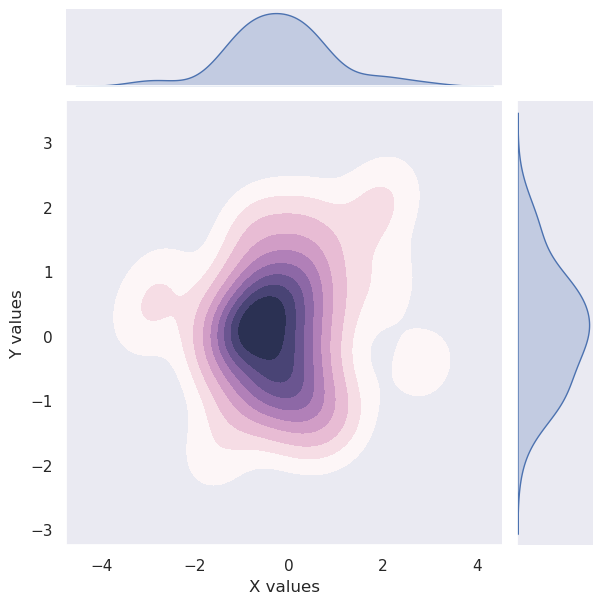

In [3]:
rng = np.random.default_rng(50)

# Generate one random bivariate dataset
x, y = rng.normal(size=(2, 50))

# --- seaborn.jointplot ---
# Create a joint plot that shows both:
# - A 2D density (KDE) plot of x vs y in the center,
# - 1D histograms or KDE curves for each variable along the top and right margins.
# Parameters:
#   x, y        - the data arrays.
#   cmap        - colormap controlling the colors used to represent density levels and KDE curves.
#   kind='kde'  - use Kernel Density Estimation for smooth density contours.
#   fill=True   - fill the KDE contours with color.
fig = sns.jointplot(x=x, y=y, cmap=cmap, kind="kde", fill=True)
fig.set_axis_labels("X values", "Y values")
plt.show()

## <a name="ex2">Exercise 2: Simulating a discrete-time homogeneous Markov chain.</a> [(&#8593;)](#content)


Let ${(X_n)}_{n\geq 0}$ be a discrete-time homogeneous Markov chain with values over a finite ensemble $E=\{x_1,\dots,x_N\}$ identified to $\{1,\dots,N\}$. Consider $\boldsymbol{\rho} \in \Delta_N$, where $\Delta_N = \{\mathbf{x}\in\mathbb{R}^N \mid x_n \geq 0 \, \forall n \in \{1,\dotsc,N\} \text{ and } \sum_n x_n = 1 \}$ is the unit simplex in $\mathbb{R}^N$.

In the following, we consider the initial state of the chain $X_0$, following the discrete probability distribution:

$$
    \mathbb{P}(X_0 = k) = \rho_k, \qquad k \in \{1, \dots,  N\}.
$$
  
Let $\mathbf{A} = [a_{i,j}]_{i,j} \in \mathbb{R}^{N \times N}$ be the transition matrix of the chain, i.e.,

\begin{align*}
    &a_{i,j} = \mathbb{P}(X_{n+1} = j \mid X_{n} = i) \geq 0, \, \forall n \geq 0, \\
    &(\forall i \in \{1, \dotsc, N\}), \quad \sum_{j=1}^N a_{i,j} = 1.
\end{align*}
 
The chain is said to be homogeneous in that $\mathbf{A}$ does not depend from the time index $n$. Let $\tilde{a}_n$ represent the $n$th row of $\mathbf{A}$. 

The trajectory of the chain can be simulated as follows:

>- Draw the discrete random variable $X_0$ with distribution $\boldsymbol{\rho}$;
>
>- For $q = 0$ to $n_{\text{iter}}-1$
>    - Draw the discrete random variable $X_{q+1}$ with distribution $\tilde{a}_{X_{q}}$;
>    
>- Return ${(X_q)}_{0 \leq q \leq n_{\text{iter}}}$.


<!-- If $X_n = k$, we know that $T$, the life time of the chain in the state $k$ obeys a geometric distribution with parameter $a_{kk}$. We also know that the probability of transition from k to $\ell\neq k$ is given by:

$$
    \mathbb{P}(X_{n+1}=\ell | X_n=k, \ell\neq k) = \frac{a_{k\ell}}{1-a_{kk}}.
$$

 ### One possible algorithm to simulate a Markov chain is therefore:

    a. generate the initial state $X_0$ according to the discrete law $\{\rho_1,\dots,\rho_N\}$.

    b. at instant $n$, knowing that $X_n=k$,

    i) determine the life time $T$ in state $X_n=k$ by simulating a geometrical variable with parameter $a_{kk}$. As a consequence $X_n = \dots = X_{n+T} = k$. When $T=0$, we simply still have $X_n=k$.

    ii) determine next transition instant $n+T$, and determine the next state by using the probabilities of transition. -->

1. Implement the above algorithm in a function `X = markov(rho,A,nmax,rng)` with:
     - `rho`: law of the initial state (nonnegative vector of size $N$, summing to 1),
     - `A`: transition matrix (of size $N\times N$),
     - `nmax`: number of time steps,
     - `rng`: random number generator
     - `X`: trajectory of the chain.
     
In particular, check the input parameters `A` and `rho` make sense by adding appropriate assertions (or raising exceptions).

> Hint: the function `np.random.choice` can be useful to draw discrete random variables.

Your answers(s)

In [4]:
def markov(rho: np.ndarray, A: np.ndarray, nmax: int, rng: np.random.Generator = None) -> np.ndarray:
    """
    Simulate a discrete-time homogeneous Markov chain on a finite state space {0,...,N-1}.

    Parameters
    ----------
    rho : array_like, shape (N,)
        Initial distribution over states (non-negative, sums to 1).
    A : array_like, shape (N, N)
        Transition matrix, where A[i, j] = P(X_{t+1}=j | X_t=i). Each row must be non-negative and sum to 1.
    nmax : int
        Number of steps to simulate. The returned trajectory contains states X_0, X_1, ..., X_{nmax}.
    rng : numpy.random.Generator, optional
        Random number generator to use (default: np.random.default_rng()).

    Returns
    -------
    X : ndarray, shape (nmax+1,)
        The simulated trajectory of states (integers in 0..N-1).
    """
    # Convert to arrays
    rho = np.asarray(rho, dtype=float)
    A = np.asarray(A, dtype=float)
    
    # Basic input checks
    if rho.ndim != 1:
        raise ValueError("rho must be a 1D array of length N (initial distribution).")
    N = rho.shape[0]
    if A.shape != (N, N):
        raise ValueError(f"A must be a square matrix of shape ({N}, {N}).")
    if nmax < 0 or int(nmax) != nmax:
        raise ValueError("nmax must be a non-negative integer.")
    nmax = int(nmax)
    
    # Check non-negativity and normalization (allow small numerical tolerance)
    if np.any(rho < -1e-12):
        raise ValueError("rho must be non-negative.")
    rho_sum = rho.sum()
    if not np.isclose(rho_sum, 1.0, atol=1e-10):
        raise ValueError(f"rho must sum to 1. Sum is {rho_sum}.")
    if np.any(A < -1e-12):
        raise ValueError("A must have non-negative entries.")
    row_sums = A.sum(axis=1)
    if not np.allclose(row_sums, 1.0, atol=1e-10):
        raise ValueError("Each row of A must sum to 1 (within numerical tolerance).")
    
    # RNG
    if rng is None:
        rng = np.random.default_rng()
    if not hasattr(rng, "choice"):
        raise ValueError("rng must be a numpy.random.Generator with a .choice method.")
    
    # Simulate trajectory
    X = np.empty(nmax + 1, dtype=int)
    # draw initial state
    X[0] = rng.choice(N, p=rho)
    for t in range(nmax):
        current = X[t]
        p = A[current]
        X[t + 1] = rng.choice(N, p=p)
    return X

In [5]:
def test_identity_transition():
    rng = np.random.default_rng(0)
    N = 4
    rho = np.array([0.1, 0.2, 0.3, 0.4])
    A = np.eye(N)
    traj = markov(rho, A, nmax=10, rng=rng)
    assert np.all(traj == traj[0]), "State should never change with identity transition."
    print("Test 1 passed: Identity transition keeps state constant.")

In [6]:
def test_deterministic_cycle():
    rng = np.random.default_rng(0)
    N = 5
    rho = np.zeros(N); rho[2] = 1.0  # start at state 2
    A = np.zeros((N, N))
    for i in range(N):
        A[i, (i+1) % N] = 1.0  # deterministic cycle
    traj = markov(rho, A, nmax=8, rng=rng)
    expected = np.array([(2 + t) % N for t in range(9)])
    assert np.array_equal(traj, expected), f"Expected {expected}, got {traj}"
    print("Test 2 passed: Deterministic cycle produced expected sequence.")

In [7]:
def test_uniform_transition():
    rng = np.random.default_rng(42)
    N = 3
    rho = np.array([1.0, 0.0, 0.0])
    A = np.ones((N, N)) / N
    counts = np.zeros(N, dtype=int)
    trials = 2000
    for _ in range(trials):
        traj = markov(rho, A, nmax=1, rng=rng)
        counts[traj[1]] += 1
    freqs = counts / trials
    assert np.allclose(freqs, np.ones(N)/N, atol=0.05), f"Frequencies not uniform: {freqs}"
    print("Test 3 passed: Uniform transition yields roughly uniform next-state frequencies.")

In [8]:
def test_invalid_rho_sum():
    rng = np.random.default_rng(0)
    bad_rho = np.array([0.5, 0.6])  # sums to 1.1
    A = np.eye(2)
    try:
        markov(bad_rho, A, nmax=1, rng=rng)
    except ValueError as e:
        print("Test 4 passed: Raised error for invalid rho sum:", str(e))
        return
    raise AssertionError("Expected ValueError for invalid rho sum.")

In [9]:
def test_invalid_A_shape():
    rng = np.random.default_rng(0)
    rho = np.array([1.0, 0.0])
    A = np.ones((3, 3)) / 3.0  # Wrong shape
    try:
        markov(rho, A, nmax=1, rng=rng)
    except ValueError as e:
        print("Test 5 passed: Raised error for mismatched A shape:", str(e))
        return
    raise AssertionError("Expected ValueError for invalid A shape.")

In [10]:
def run_all_tests():
    tests = [
        test_identity_transition,
        test_deterministic_cycle,
        test_uniform_transition,
        test_invalid_rho_sum,
        test_invalid_A_shape
    ]
    print("Running all unit tests...\n")
    for t in tests:
        t()

# Run all
run_all_tests()

Running all unit tests...

Test 1 passed: Identity transition keeps state constant.
Test 2 passed: Deterministic cycle produced expected sequence.
Test 3 passed: Uniform transition yields roughly uniform next-state frequencies.
Test 4 passed: Raised error for invalid rho sum: rho must sum to 1. Sum is 1.1.
Test 5 passed: Raised error for mismatched A shape: A must be a square matrix of shape (2, 2).


2. Set the random number generator to a known state. Make a few simulations using simple transition matrices (*i.e.*, taking any nonnegative matrix $A=(a_{i,j})$ such that its lines sum to 1) and display the trajectory of the chains.

Your answers(s)

In [11]:
# Fix the random generator seed for reproducibility
rng = np.random.default_rng(seed=42)

In [12]:
# Example 1: Simple 2-state chain
A1 = np.array([
    [0.8, 0.2],
    [0.3, 0.7]
])
rho1 = np.array([0.5, 0.5])

# Example 2: 3-state chain
A2 = np.array([
    [0.1, 0.6, 0.3],
    [0.3, 0.4, 0.3],
    [0.5, 0.2, 0.3]
])
rho2 = np.array([0.2, 0.5, 0.3])

# Example 3: Deterministic cycle
A3 = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])
rho3 = np.array([1.0, 0.0, 0.0])

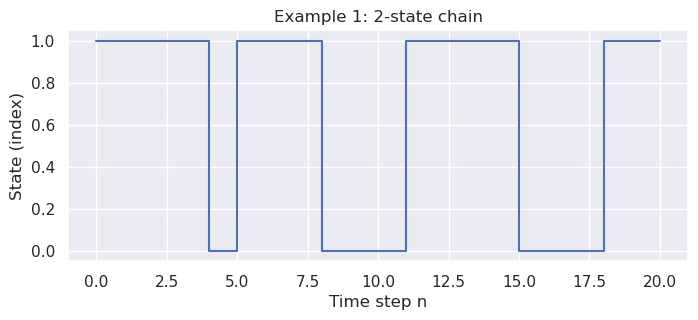

Trajectory: [1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1]



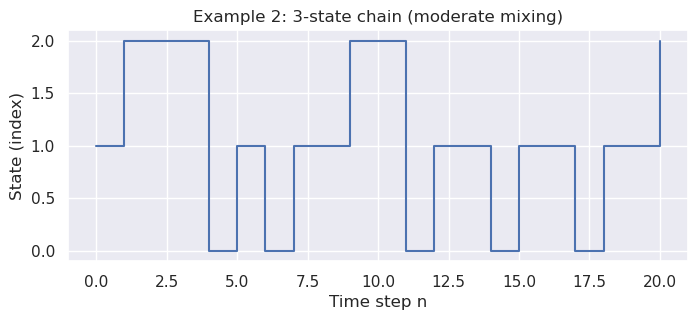

Trajectory: [1 2 2 2 0 1 0 1 1 2 2 0 1 1 0 1 1 0 1 1 2]



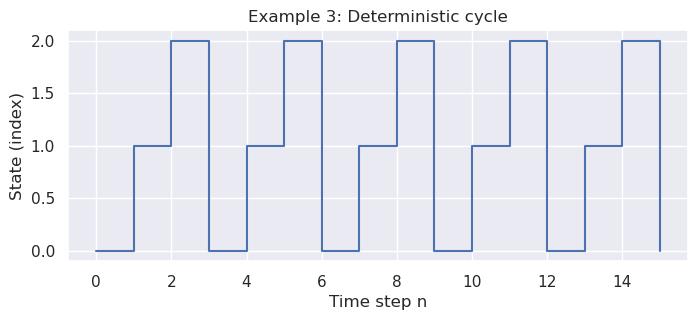

Trajectory: [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0]



In [13]:
def simulate_and_plot(A, rho, nmax, title):
    traj = markov(rho, A, nmax, rng=rng)
    plt.figure(figsize=(8, 3))
    plt.step(range(nmax + 1), traj, where='post')
    plt.xlabel("Time step n")
    plt.ylabel("State (index)")
    plt.title(title)
    plt.grid(True)
    plt.show()
    print("Trajectory:", traj)
    print()

simulate_and_plot(A1, rho1, nmax=20, title="Example 1: 2-state chain")
simulate_and_plot(A2, rho2, nmax=20, title="Example 2: 3-state chain (moderate mixing)")
simulate_and_plot(A3, rho3, nmax=15, title="Example 3: Deterministic cycle")

3. Explore the potential of the [`multiprocessing` package](https://docs.python.org/3/library/multiprocessing.html) to simulate several Markov chains in parallel.

> Hint: the `mutiprocessing.Pool.starmap` or `mutiprocessing.Pool.starmap_async` methods could be useful.

Your answers(s)

In [14]:
from multiprocessing import Pool
import timeit

In [15]:
def simulate_chain(rho, A, nmax, seed):
    """
    Helper function for parallel execution.
    Each process gets its own RNG with a unique seed to avoid correlation.
    """
    rng = np.random.default_rng(seed)
    return markov(rho, A, nmax, rng)

In [16]:
N = 5
A = np.array([
    [0.4, 0.3, 0.1, 0.1, 0.1],
    [0.2, 0.4, 0.2, 0.1, 0.1],
    [0.1, 0.2, 0.5, 0.1, 0.1],
    [0.3, 0.2, 0.1, 0.3, 0.1],
    [0.25, 0.25, 0.25, 0.15, 0.1]
])
rho = np.ones(N) / N
nmax = 5000
n_chains = 50  # simulate 50 chains

args_list = [(rho, A, nmax, i) for i in range(n_chains)]

In [17]:
# Number of repetitions for averaging
repeats = 5

def run_sequential():
    results = []
    for args in args_list:
        results.append(simulate_chain(*args))
    return results

t_seq = timeit.timeit(stmt='run_sequential()', globals=globals(), number=repeats) / repeats
print(f"Average sequential simulation time over {repeats} runs: {t_seq:.4f} seconds")

Average sequential simulation time over 5 runs: 4.1086 seconds


In [18]:
N_PROCESSES=8
def run_parallel():
    with Pool(processes=N_PROCESSES) as pool:  # adjust to your CPU
        results = pool.starmap(simulate_chain, args_list)
    return results

# Measure average parallel time
t_par = timeit.timeit(stmt='run_parallel()', globals=globals(), number=repeats) / repeats

print(f"Average parallel simulation time over {repeats} runs: {t_par:.4f} seconds (using {N_PROCESSES} processes)")
print()
print(f"Approximate speedup: x{t_seq / t_par:.2f} faster")

Average parallel simulation time over 5 runs: 1.3460 seconds (using 8 processes)

Approximate speedup: x3.05 faster


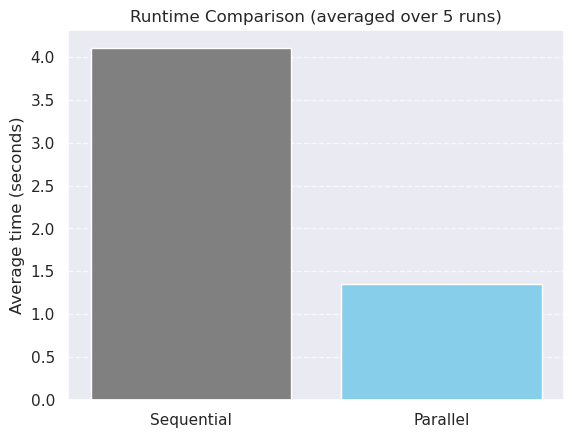

In [19]:
plt.bar(["Sequential", "Parallel"], [t_seq, t_par], color=["gray", "skyblue"])
plt.ylabel("Average time (seconds)")
plt.title(f"Runtime Comparison (averaged over {repeats} runs)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

4. [Bonus] Generate Markov chains in parallel with the [`dask`](https://docs.dask.org/en/latest/futures.html) library, which offers more general parallelization functionalities (with, for instance, the use of [`Futures`](https://docs.dask.org/en/stable/futures.html), see tutorial [here](https://tutorial.dask.org/05_futures.html)). A useful example is provided [here](https://stackoverflow.com/questions/41471248/how-to-efficiently-submit-tasks-with-large-arguments-in-dask-distributed). Note that `dask` is much more versatile and powerful than `multiprocessing`, and can be useful to scale algorithms over multiple cores and/or computing nodes.

Your answers(s)

In [20]:
import time
from dask.distributed import Client, as_completed

In [21]:
# Create a local dask client
client = Client()

# Example transition matrix and initial distribution
N = 5
A = np.array([
    [0.4, 0.3, 0.1, 0.1, 0.1],
    [0.2, 0.4, 0.2, 0.1, 0.1],
    [0.1, 0.2, 0.5, 0.1, 0.1],
    [0.3, 0.2, 0.1, 0.3, 0.1],
    [0.25, 0.25, 0.25, 0.15, 0.1]
])
rho = np.ones(N) / N
nmax = 5000

# Scatter A and rho to workers so they are transferred once and reused
A_future = client.scatter(A, broadcast=True)
rho_future = client.scatter(rho, broadcast=True)

In [22]:
# Number of independent chains to simulate
n_chains = 40

# Prepare unique seeds for reproducibility
seeds = [100 + i for i in range(n_chains)]

# Option A: using client.map with repeated futures for rho and A
# client.map accepts iterables; to reuse the same future for every task, repeat it n_chains times
rhos = [rho_future] * n_chains
As = [A_future] * n_chains
nmax_list = [nmax] * n_chains

t0 = time.perf_counter()

# Launch tasks in parallel; this returns futures immediately
futures = client.map(simulate_chain, rhos, As, nmax_list, seeds)

t1 = time.perf_counter()
elapsed = t1 - t0
print(f"Submitted {n_chains} chains with dask and waited for completion. Time elapsed: {elapsed:.3f} s")

results = client.gather(futures) # list of numpy arrays (trajectories)

Submitted 40 chains with dask and waited for completion. Time elapsed: 0.012 s


In [23]:
# Measure sequential time for the same number of chains for rough comparison
t0 = time.perf_counter()
seq_results = [simulate_chain(rho, A, nmax, seed) for seed in seeds]
t1 = time.perf_counter()
seq_elapsed = t1 - t0
print(f"Sequential time for {n_chains} chains: {seq_elapsed:.3f} s")
print(f"Dask (parallel) time recorded earlier: {elapsed:.3f} s")
print(f"Approximate speedup (seq / dask): x{seq_elapsed / elapsed:.2f}")

Sequential time for 40 chains: 8.513 s
Dask (parallel) time recorded earlier: 0.012 s
Approximate speedup (seq / dask): x709.75


In [24]:
client.close()

## <a name="bonus">Bonus: Parallel computing with Dask</a> [(&#8593;)](#content)

1. Take a look at the [`dask.array` documentation](https://docs.dask.org/en/stable/array-best-practices.html) and the associate [tutorial](https://tutorial.dask.org/02_array.html). Apply some of the functions introduced herein and in the [documentation](https://docs.dask.org/en/stable/array-best-practices.html) to parallelize the computation of the total variation investigated during session 2. Note that you can combine `dask` and `numba` to obtain an overall more efficient implementation. Note that timing can be worse than Numpy (`dask.array` is more specifically interesting when the data do no fit in memory).

2. Take a look at the [`dask.delayed` tutorial](https://tutorial.dask.org/03_dask.delayed.html), and go through some of the examples provided. [Best practices with the `dask.delayed` interface](https://docs.dask.org/en/stable/delayed-best-practices.html) are summarized in the documentation.

> **Remark**: an alternative to Dask: the [Ray](https://docs.ray.io/en/latest/) library.

Your answers(s)

In [25]:
from numba import njit
import dask.array as da
from dask.distributed import Client, LocalCluster
from dask import delayed, compute

In [26]:
@njit(fastmath=True)
def block_tv_numba(block):
    """Compute per-pixel TV contribution sqrt(|Dh|^2+|Dv|^2) for a 2D block."""
    M, N = block.shape
    out = np.empty((M, N), dtype=np.float64)
    for i in range(M):
        for j in range(N):
            dh = 0.0 if i == M - 1 else block[i+1, j] - block[i, j]
            dv = 0.0 if j == N - 1 else block[i, j+1] - block[i, j]
            out[i, j] = np.sqrt(dh*dh + dv*dv)
    return out

In [27]:
def tv_dask_numba(X, chunks=(512, 512)):
    """
    Compute total variation using Dask with Numba acceleration.
    Uses 1-pixel overlap between chunks.
    """
    darr = da.from_array(X, chunks=chunks)
    contrib = darr.map_overlap(block_tv_numba, depth=(1, 1),
                               boundary=0, dtype=float, trim=True)
    return float(contrib.sum().compute())

In [28]:
# Start local cluster
cluster = LocalCluster(n_workers=4, threads_per_worker=1, processes=True)
client = Client(cluster)
print("Dask client started.")

# Test data
M, N = 4000, 3000
X = np.random.randn(M, N).astype(np.float64)

# Baseline (NumPy)
def tv_numpy(X):
    Dh = np.diff(X, axis=0, append=0)
    Dv = np.diff(X, axis=1, append=0)
    return np.sum(np.sqrt(Dh*Dh + Dv*Dv))

def timeit_avg(fn, *args, n=3):
    t = []
    for _ in range(n):
        t0 = time.perf_counter()
        v = fn(*args)
        t.append(time.perf_counter() - t0)
    return np.mean(t), v

t_np, v_np = timeit_avg(tv_numpy, X, n=1)
t_dask, v_dask = timeit_avg(tv_dask_numba, X, n=3)

print(f"NumPy TV = {v_np:.6e}, avg time = {t_np:.3f}s")
print(f"Dask+Numba TV = {v_dask:.6e}, avg time = {t_dask:.3f}s")
print(f"Speedup = x{t_np/t_dask:.2f}")

Dask client started.


/home/dpechenev/anaconda3/envs/ptr_lab5/lib/python3.13/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 91.57 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/dpechenev/anaconda3/envs/ptr_lab5/lib/python3.13/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 91.57 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/dpechenev/anaconda3/envs/ptr_lab5/lib/python3.13/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of

NumPy TV = 2.091072e+07, avg time = 0.329s
Dask+Numba TV = 2.091072e+07, avg time = 2.393s
Speedup = x0.14


In [29]:
client.close()
cluster.close()
print("Cluster closed.")

Cluster closed.


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
NumPy indeed works faster than Dask + Numba in this case
</div>